In [1]:
# Import the much needed stuff for training
import pandas as pd
import numpy as np
import tensorflow as tf
import mediapipe as mp
import os
import csv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import time
import HandTrackingModule as htm

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

# Checking Tensorflow Version
tf.__version__

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils 
hands = mp_hands.Hands()

In [2]:
# dẫn vào folder validate
Feature_Extraction_for_VALIDATION_path = 'F:/Coding stuff/grpPRJ/demo v2 (cnn + mediapipe)/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/validation'

# test image path
test_imgage_path = "F:/Coding stuff/grpPRJ/demo v2 (cnn + mediapipe)/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/test/F.jpg"



In [3]:
# Function to Extract Feature from images or Frame
def extract_feature(input_image):
    image = cv2.imread(input_image)
    with mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.1) as hands:
        while True:
            results = hands.process(cv2.flip(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 1))
            image_height, image_width, _ = image.shape
            # Print handedness (left v.s. right hand).
            # Caution : Uncomment these print command will resulting long log of mediapipe log
            #print(f'Handedness of {input_image}:')
            #print(results.multi_handedness)

            # Draw hand landmarks of each hand.
            # Caution : Uncomment these print command will resulting long log of mediapipe log
            #print(f'Hand landmarks of {input_image}:')
            if not results.multi_hand_landmarks:
                # Here we will set whole landmarks into zero as no handpose detected
                # in a picture wanted to extract.
                
                # Wrist Hand
                wristX = 0
                wristY = 0
                wristZ = 0
                
                # Thumb Finger
                thumb_CmcX = 0
                thumb_CmcY = 0
                thumb_CmcZ = 0
                
                thumb_McpX = 0
                thumb_McpY = 0
                thumb_McpZ = 0
                
                thumb_IpX = 0
                thumb_IpY = 0
                thumb_IpZ = 0
                
                thumb_TipX = 0
                thumb_TipY = 0
                thumb_TipZ = 0

                # Index Finger
                index_McpX = 0
                index_McpY = 0
                index_McpZ = 0
                
                index_PipX = 0
                index_PipY = 0
                index_PipZ = 0
                
                index_DipX = 0
                index_DipY = 0
                index_DipZ = 0
                
                index_TipX = 0
                index_TipY = 0
                index_TipZ = 0

                # Middle Finger
                middle_McpX = 0
                middle_McpY = 0
                middle_McpZ = 0
                
                middle_PipX = 0
                middle_PipY = 0
                middle_PipZ = 0
                
                middle_DipX = 0
                middle_DipY = 0
                middle_DipZ = 0
                
                middle_TipX = 0
                middle_TipY = 0
                middle_TipZ = 0

                # Ring Finger
                ring_McpX = 0
                ring_McpY = 0
                ring_McpZ = 0
                
                ring_PipX = 0
                ring_PipY = 0
                ring_PipZ = 0
                
                ring_DipX = 0
                ring_DipY = 0
                ring_DipZ = 0
                
                ring_TipX = 0
                ring_TipY = 0
                ring_TipZ = 0

                # Pinky Finger
                pinky_McpX = 0
                pinky_McpY = 0
                pinky_McpZ = 0
                
                pinky_PipX = 0
                pinky_PipY = 0
                pinky_PipZ = 0
                
                pinky_DipX = 0
                pinky_DipY = 0
                pinky_DipZ = 0
                
                pinky_TipX = 0
                pinky_TipY = 0
                pinky_TipZ = 0
                
                # Set image to Zero
                annotated_image = 0

                # Return Whole Landmark and Image
                return (wristX, wristY, wristZ,
                        thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                        thumb_McpX, thumb_McpY, thumb_McpZ,
                        thumb_IpX, thumb_IpY, thumb_IpZ,
                        thumb_TipX, thumb_TipY, thumb_TipZ,
                        index_McpX, index_McpY, index_McpZ,
                        index_PipX, index_PipY, index_PipZ,
                        index_DipX, index_DipY, index_DipZ,
                        index_TipX, index_TipY, index_TipZ,
                        middle_McpX, middle_McpY, middle_McpZ,
                        middle_PipX, middle_PipY, middle_PipZ,
                        middle_DipX, middle_DipY, middle_DipZ,
                        middle_TipX, middle_TipY, middle_TipZ,
                        ring_McpX, ring_McpY, ring_McpZ,
                        ring_PipX, ring_PipY, ring_PipZ,
                        ring_DipX, ring_DipY, ring_DipZ,
                        ring_TipX, ring_TipY, ring_TipZ,
                        pinky_McpX, pinky_McpY, pinky_McpZ,
                        pinky_PipX, pinky_PipY, pinky_PipZ,
                        pinky_DipX, pinky_DipY, pinky_DipZ,
                        pinky_TipX, pinky_TipY, pinky_TipZ,
                        annotated_image)
            
            annotated_image = cv2.flip(image.copy(), 1)
            for hand_landmarks in results.multi_hand_landmarks:
                # Wrist Hand /  Pergelangan Tangan
                wristX = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].x * image_width
                wristY = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].y * image_height
                wristZ = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].z

                # Thumb Finger / Ibu Jari
                thumb_CmcX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].x * image_width
                thumb_CmcY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].y * image_height
                thumb_CmcZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].z
                
                thumb_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].x * image_width
                thumb_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].y * image_height
                thumb_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].z
                
                thumb_IpX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].x * image_width
                thumb_IpY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].y * image_height
                thumb_IpZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].z
                
                thumb_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].x * image_width
                thumb_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].y * image_height
                thumb_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].z

                # Index Finger / Jari Telunjuk
                index_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].x * image_width
                index_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].y * image_height
                index_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].z
                
                index_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].x * image_width
                index_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].y * image_height
                index_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].z
                
                index_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].x * image_width
                index_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].y * image_height
                index_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].z
                
                index_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width
                index_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height
                index_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].z

                # Middle Finger / Jari Tengah
                middle_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].x * image_width
                middle_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].y * image_height
                middle_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].z
                
                middle_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].x * image_width
                middle_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].y * image_height
                middle_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].z
                
                middle_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].x * image_width
                middle_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].y * image_height
                middle_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].z
                
                middle_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].x * image_width
                middle_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].y * image_height
                middle_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].z

                # Ring Finger / Jari Cincin
                ring_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].x * image_width
                ring_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].y * image_height
                ring_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].z
                
                ring_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].x * image_width
                ring_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].y * image_height
                ring_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].z
                
                ring_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].x * image_width
                ring_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].y * image_height
                ring_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].z
                
                ring_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].x * image_width
                ring_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].y * image_height
                ring_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].z

                # Pinky Finger / Jari Kelingking
                pinky_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].x * image_width
                pinky_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].y * image_height
                pinky_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].z
                
                pinky_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].x * image_width
                pinky_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].y * image_height
                pinky_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].z
                
                pinky_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].x * image_width
                pinky_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].y * image_height
                pinky_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].z
                
                pinky_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].x * image_width
                pinky_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].y * image_height
                pinky_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].z

                # Draw the Skeleton
                mp_drawing.draw_landmarks(annotated_image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
                
            return (wristX, wristY, wristZ,
                    thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                    thumb_McpX, thumb_McpY, thumb_McpZ,
                    thumb_IpX, thumb_IpY, thumb_IpZ,
                    thumb_TipX, thumb_TipY, thumb_TipZ,
                    index_McpX, index_McpY, index_McpZ,
                    index_PipX, index_PipY, index_PipZ,
                    index_DipX, index_DipY, index_DipZ,
                    index_TipX, index_TipY, index_TipZ,
                    middle_McpX, middle_McpY, middle_McpZ,
                    middle_PipX, middle_PipY, middle_PipZ,
                    middle_DipX, middle_DipY, middle_DipZ,
                    middle_TipX, middle_TipY, middle_TipZ,
                    ring_McpX, ring_McpY, ring_McpZ,
                    ring_PipX, ring_PipY, ring_PipZ,
                    ring_DipX, ring_DipY, ring_DipZ,
                    ring_TipX, ring_TipY, ring_TipZ,
                    pinky_McpX, pinky_McpY, pinky_McpZ,
                    pinky_PipX, pinky_PipY, pinky_PipZ,
                    pinky_DipX, pinky_DipY, pinky_DipZ,
                    pinky_TipX, pinky_TipY, pinky_TipZ,
                    annotated_image)

In [4]:
# Function to Extract Feature from images or Frame
def extract_feature_vid(input_image):
    image = input_image
    with mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.1) as hands:
        while True:
            results = hands.process(cv2.flip(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 1))
            image_height, image_width, _ = image.shape
            # Print handedness (left v.s. right hand).
            # Caution : Uncomment these print command will resulting long log of mediapipe log
            #print(f'Handedness of {input_image}:')
            #print(results.multi_handedness)

            # Draw hand landmarks of each hand.
            # Caution : Uncomment these print command will resulting long log of mediapipe log
            #print(f'Hand landmarks of {input_image}:')
            if not results.multi_hand_landmarks:
                # Here we will set whole landmarks into zero as no handpose detected
                # in a picture wanted to extract.
                
                # Wrist Hand
                wristX = 0
                wristY = 0
                wristZ = 0
                
                # Thumb Finger
                thumb_CmcX = 0
                thumb_CmcY = 0
                thumb_CmcZ = 0
                
                thumb_McpX = 0
                thumb_McpY = 0
                thumb_McpZ = 0
                
                thumb_IpX = 0
                thumb_IpY = 0
                thumb_IpZ = 0
                
                thumb_TipX = 0
                thumb_TipY = 0
                thumb_TipZ = 0

                # Index Finger
                index_McpX = 0
                index_McpY = 0
                index_McpZ = 0
                
                index_PipX = 0
                index_PipY = 0
                index_PipZ = 0
                
                index_DipX = 0
                index_DipY = 0
                index_DipZ = 0
                
                index_TipX = 0
                index_TipY = 0
                index_TipZ = 0

                # Middle Finger
                middle_McpX = 0
                middle_McpY = 0
                middle_McpZ = 0
                
                middle_PipX = 0
                middle_PipY = 0
                middle_PipZ = 0
                
                middle_DipX = 0
                middle_DipY = 0
                middle_DipZ = 0
                
                middle_TipX = 0
                middle_TipY = 0
                middle_TipZ = 0

                # Ring Finger
                ring_McpX = 0
                ring_McpY = 0
                ring_McpZ = 0
                
                ring_PipX = 0
                ring_PipY = 0
                ring_PipZ = 0
                
                ring_DipX = 0
                ring_DipY = 0
                ring_DipZ = 0
                
                ring_TipX = 0
                ring_TipY = 0
                ring_TipZ = 0

                # Pinky Finger
                pinky_McpX = 0
                pinky_McpY = 0
                pinky_McpZ = 0
                
                pinky_PipX = 0
                pinky_PipY = 0
                pinky_PipZ = 0
                
                pinky_DipX = 0
                pinky_DipY = 0
                pinky_DipZ = 0
                
                pinky_TipX = 0
                pinky_TipY = 0
                pinky_TipZ = 0
                
                # Set image to Zero
                annotated_image = cv2.flip(input_image,1)

                # Return Whole Landmark and Image
                return (wristX, wristY, wristZ,
                        thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                        thumb_McpX, thumb_McpY, thumb_McpZ,
                        thumb_IpX, thumb_IpY, thumb_IpZ,
                        thumb_TipX, thumb_TipY, thumb_TipZ,
                        index_McpX, index_McpY, index_McpZ,
                        index_PipX, index_PipY, index_PipZ,
                        index_DipX, index_DipY, index_DipZ,
                        index_TipX, index_TipY, index_TipZ,
                        middle_McpX, middle_McpY, middle_McpZ,
                        middle_PipX, middle_PipY, middle_PipZ,
                        middle_DipX, middle_DipY, middle_DipZ,
                        middle_TipX, middle_TipY, middle_TipZ,
                        ring_McpX, ring_McpY, ring_McpZ,
                        ring_PipX, ring_PipY, ring_PipZ,
                        ring_DipX, ring_DipY, ring_DipZ,
                        ring_TipX, ring_TipY, ring_TipZ,
                        pinky_McpX, pinky_McpY, pinky_McpZ,
                        pinky_PipX, pinky_PipY, pinky_PipZ,
                        pinky_DipX, pinky_DipY, pinky_DipZ,
                        pinky_TipX, pinky_TipY, pinky_TipZ,
                        annotated_image)
            
            annotated_image = cv2.flip(image.copy(), 1)
            for hand_landmarks in results.multi_hand_landmarks:
                # Wrist Hand /  Pergelangan Tangan
                wristX = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].x * image_width
                wristY = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].y * image_height
                wristZ = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].z

                # Thumb Finger / Ibu Jari
                thumb_CmcX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].x * image_width
                thumb_CmcY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].y * image_height
                thumb_CmcZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].z
                
                thumb_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].x * image_width
                thumb_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].y * image_height
                thumb_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].z
                
                thumb_IpX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].x * image_width
                thumb_IpY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].y * image_height
                thumb_IpZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].z
                
                thumb_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].x * image_width
                thumb_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].y * image_height
                thumb_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].z

                # Index Finger / Jari Telunjuk
                index_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].x * image_width
                index_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].y * image_height
                index_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].z
                
                index_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].x * image_width
                index_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].y * image_height
                index_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].z
                
                index_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].x * image_width
                index_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].y * image_height
                index_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].z
                
                index_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width
                index_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height
                index_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].z

                # Middle Finger / Jari Tengah
                middle_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].x * image_width
                middle_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].y * image_height
                middle_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].z
                
                middle_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].x * image_width
                middle_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].y * image_height
                middle_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].z
                
                middle_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].x * image_width
                middle_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].y * image_height
                middle_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].z
                
                middle_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].x * image_width
                middle_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].y * image_height
                middle_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].z

                # Ring Finger / Jari Cincin
                ring_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].x * image_width
                ring_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].y * image_height
                ring_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].z
                
                ring_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].x * image_width
                ring_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].y * image_height
                ring_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].z
                
                ring_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].x * image_width
                ring_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].y * image_height
                ring_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].z
                
                ring_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].x * image_width
                ring_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].y * image_height
                ring_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].z

                # Pinky Finger / Jari Kelingking
                pinky_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].x * image_width
                pinky_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].y * image_height
                pinky_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].z
                
                pinky_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].x * image_width
                pinky_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].y * image_height
                pinky_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].z
                
                pinky_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].x * image_width
                pinky_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].y * image_height
                pinky_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].z
                
                pinky_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].x * image_width
                pinky_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].y * image_height
                pinky_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].z

                # Draw the Skeleton
                mp_drawing.draw_landmarks(annotated_image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
                
            return (wristX, wristY, wristZ,
                    thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                    thumb_McpX, thumb_McpY, thumb_McpZ,
                    thumb_IpX, thumb_IpY, thumb_IpZ,
                    thumb_TipX, thumb_TipY, thumb_TipZ,
                    index_McpX, index_McpY, index_McpZ,
                    index_PipX, index_PipY, index_PipZ,
                    index_DipX, index_DipY, index_DipZ,
                    index_TipX, index_TipY, index_TipZ,
                    middle_McpX, middle_McpY, middle_McpZ,
                    middle_PipX, middle_PipY, middle_PipZ,
                    middle_DipX, middle_DipY, middle_DipZ,
                    middle_TipX, middle_TipY, middle_TipZ,
                    ring_McpX, ring_McpY, ring_McpZ,
                    ring_PipX, ring_PipY, ring_PipZ,
                    ring_DipX, ring_DipY, ring_DipZ,
                    ring_TipX, ring_TipY, ring_TipZ,
                    pinky_McpX, pinky_McpY, pinky_McpZ,
                    pinky_PipX, pinky_PipY, pinky_PipZ,
                    pinky_DipX, pinky_DipY, pinky_DipZ,
                    pinky_TipX, pinky_TipY, pinky_TipZ,
                    annotated_image)

In [5]:
#Function to create CSV file or add dataset to the existed CSV file
def toCSV(filecsv, class_type,
          wristX, wristY, wristZ,
          thumb_CmcX, thumb_CmcY, thumb_CmcZ,
          thumb_McpX, thumb_McpY, thumb_McpZ,
          thumb_IpX, thumb_IpY, thumb_IpZ,
          thumb_TipX, thumb_TipY, thumb_TipZ,
          index_McpX, index_McpY, index_McpZ,
          index_PipX, index_PipY, index_PipZ,
          index_DipX, index_DipY, index_DipZ,
          index_TipX, index_TipY, index_TipZ,
          middle_McpX, middle_McpY, middle_McpZ,
          middle_PipX, middle_PipY, middle_PipZ,
          middle_DipX, middle_DipY, middle_DipZ,
          middle_TipX, middle_TipY, middle_TipZ,
          ring_McpX, ring_McpY, ring_McpZ,
          ring_PipX, ring_PipY, ring_PipZ,
          ring_DipX, ring_DipY, ring_DipZ,
          ring_TipX, ring_TipY, ring_TipZ,
          pinky_McpX, pinky_McpY, pinky_McpZ,
          pinky_PipX, pinky_PipY, pinky_PipZ,
          pinky_DipX, pinky_DipY, pinky_DipZ,
          pinky_TipX, pinky_TipY, pinky_TipZ):
    if os.path.isfile(filecsv):
        #print ("File exist thus shall write append to the file")
        with open(filecsv, 'a+', newline='') as file:
            # Create a writer object from csv module
            writer = csv.writer(file)
            writer.writerow([class_type,
                             wristX, wristY, wristZ,
                             thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                             thumb_McpX, thumb_McpY, thumb_McpZ,
                             thumb_IpX, thumb_IpY, thumb_IpZ,
                             thumb_TipX, thumb_TipY, thumb_TipZ,
                             index_McpX, index_McpY, index_McpZ,
                             index_PipX, index_PipY, index_PipZ,
                             index_DipX, index_DipY, index_DipZ,
                             index_TipX, index_TipY, index_TipZ,
                             middle_McpX, middle_McpY, middle_McpZ,
                             middle_PipX, middle_PipY, middle_PipZ,
                             middle_DipX, middle_DipY, middle_DipZ,
                             middle_TipX, middle_TipY, middle_TipZ,
                             ring_McpX, ring_McpY, ring_McpZ,
                             ring_PipX, ring_PipY, ring_PipZ,
                             ring_DipX, ring_DipY, ring_DipZ,
                             ring_TipX, ring_TipY, ring_TipZ,
                             pinky_McpX, pinky_McpY, pinky_McpZ,
                             pinky_PipX, pinky_PipY, pinky_PipZ,
                             pinky_DipX, pinky_DipY, pinky_DipZ,
                             pinky_TipX, pinky_TipY, pinky_TipZ])
    else:
        #print ("File not exist thus shall create new file as", filecsv)
        with open(filecsv, 'w', newline='') as file:
            # Create a writer object from csv module
            writer = csv.writer(file)
            writer.writerow(["class_type",
                             "wristX", "wristY", "wristZ",
                             "thumb_CmcX", "thumb_CmcY", "thumb_CmcZ",
                             "thumb_McpX", "thumb_McpY", "thumb_McpZ",
                             "thumb_IpX", "thumb_IpY", "thumb_IpZ",
                             "thumb_TipX", "thumb_TipY", "thumb_TipZ",
                             "index_McpX", "index_McpY", "index_McpZ",
                             "index_PipX", "index_PipY", "index_PipZ",
                             "index_DipX", "index_DipY", "index_DipZ",
                             "index_TipX", "index_TipY", "index_TipZ",
                             "middle_McpX", "middle_McpY", "middle_McpZ",
                             "middle_PipX", "middle_PipY", "middle_PipZ",
                             "middle_DipX", "middle_DipY", "middle_DipZ",
                             "middle_TipX", "middle_TipY", "middle_TipZ",
                             "ring_McpX", "ring_McpY", "ring_McpZ",
                             "ring_PipX", "ring_PipY", "ring_PipZ",
                             "ring_DipX", "ring_DipY", "ring_DipZ",
                             "ring_TipX", "ring_TipY", "ring_TipZ",
                             "pinky_McpX", "pinky_McpY", "pinky_McpZ",
                             "pinky_PipX", "pinky_PipY", "pinky_PipZ",
                             "pinky_DipX", "pinky_DipY", "pinky_DipZ",
                             "pinky_TipX", "pinky_TipY", "pinky_TipZ"])
            writer.writerow([class_type,
                             wristX, wristY, wristZ,
                             thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                             thumb_McpX, thumb_McpY, thumb_McpZ,
                             thumb_IpX, thumb_IpY, thumb_IpZ,
                             thumb_TipX, thumb_TipY, thumb_TipZ,
                             index_McpX, index_McpY, index_McpZ,
                             index_PipX, index_PipY, index_PipZ,
                             index_DipX, index_DipY, index_DipZ,
                             index_TipX, index_TipY, index_TipZ,
                             middle_McpX, middle_McpY, middle_McpZ,
                             middle_PipX, middle_PipY, middle_PipZ,
                             middle_DipX, middle_DipY, middle_DipZ,
                             middle_TipX, middle_TipY, middle_TipZ,
                             ring_McpX, ring_McpY, ring_McpZ,
                             ring_PipX, ring_PipY, ring_PipZ,
                             ring_DipX, ring_DipY, ring_DipZ,
                             ring_TipX, ring_TipY, ring_TipZ,
                             pinky_McpX, pinky_McpY, pinky_McpZ,
                             pinky_PipX, pinky_PipY, pinky_PipZ,
                             pinky_DipX, pinky_DipY, pinky_DipZ,
                             pinky_TipX, pinky_TipY, pinky_TipZ])

In [6]:
model = tf.keras.models.load_model('best2.keras')

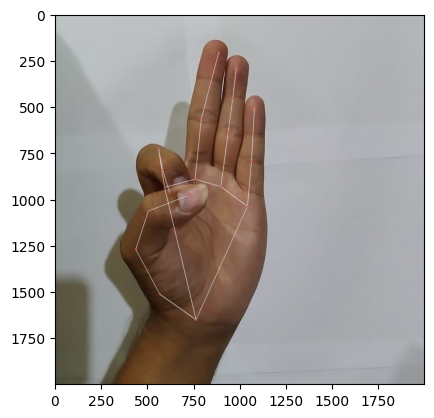

In [7]:
# Directly from Imageset Dataset Testing
#Load Image and do Feature Extraction
path_to_image = test_imgage_path

(wristX, wristY, wristZ,
 thumb_CmcX, thumb_CmcY, thumb_CmcZ,
 thumb_McpX, thumb_McpY, thumb_McpZ,
 thumb_IpX, thumb_IpY, thumb_IpZ,
 thumb_TipX, thumb_TipY, thumb_TipZ,
 index_McpX, index_McpY, index_McpZ,
 index_PipX, index_PipY, index_PipZ,
 index_DipX, index_DipY, index_DipZ,
 index_TipX, index_TipY, index_TipZ,
 middle_McpX, middle_McpY, middle_McpZ,
 middle_PipX, middle_PipY, middle_PipZ,
 middle_DipX, middle_DipY, middle_DipZ,
 middle_TipX, middle_TipY, middle_TipZ,
 ring_McpX, ring_McpY, ring_McpZ,
 ring_PipX, ring_PipY, ring_PipZ,
 ring_DipX, ring_DipY, ring_DipZ,
 ring_TipX, ring_TipY, ring_TipZ,
 pinky_McpX, pinky_McpY, pinky_McpZ,
 pinky_PipX, pinky_PipY, pinky_PipZ,
 pinky_DipX, pinky_DipY, pinky_DipZ,
 pinky_TipX, pinky_TipY, pinky_TipZ,
 output_IMG) = extract_feature(path_to_image)

#print(wristX, wristY,
#      thumb_CmcX, thumb_CmcY, thumb_McpX, thumb_McpY, thumb_IpX, thumb_IpY, thumb_TipX, thumb_TipY,
#      index_McpX, index_McpY, index_PipX, index_PipY, index_DipX, index_DipY, index_TipX, index_TipY,
#      middle_McpX, middle_McpY, middle_PipX, middle_PipY, middle_DipX, middle_DipY, middle_TipX, middle_TipY,
#      ring_McpX, ring_McpY, ring_PipX, ring_PipY, ring_DipX, ring_DipY, ring_TipX, ring_TipY,
#      pinky_McpX, pinky_McpY, pinky_PipX, pinky_PipY, pinky_DipX, pinky_DipY, pinky_TipX, pinky_TipY)
# plt.axis("on")
plt.imshow(cv2.cvtColor(output_IMG, cv2.COLOR_BGR2RGB))
plt.show()

In [8]:
#Shape the image features into an 1x3 array.
input_IMG = np.array([[[wristX], [wristY], [wristZ],
                     [thumb_CmcX], [thumb_CmcY], [thumb_CmcZ],
                     [thumb_McpX], [thumb_McpY], [thumb_McpZ],
                     [thumb_IpX], [thumb_IpY], [thumb_IpZ],
                     [thumb_TipX], [thumb_TipY], [thumb_TipZ],
                     [index_McpX], [index_McpY], [index_McpZ],
                     [index_PipX], [index_PipY], [index_PipZ],
                     [index_DipX], [index_DipY], [index_DipZ],
                     [index_TipX], [index_TipY], [index_TipZ],
                     [middle_McpX], [middle_McpY], [middle_McpZ],
                     [middle_PipX], [middle_PipY], [middle_PipZ],
                     [middle_DipX], [middle_DipY], [middle_DipZ],
                     [middle_TipX], [middle_TipY], [middle_TipZ],
                     [ring_McpX], [ring_McpY], [ring_McpZ],
                     [ring_PipX], [ring_PipY], [ring_PipZ],
                     [ring_DipX], [ring_DipY], [ring_DipZ],
                     [ring_TipX], [ring_TipY], [ring_TipZ],
                     [pinky_McpX], [pinky_McpY], [pinky_McpZ],
                     [pinky_PipX], [pinky_PipY], [pinky_PipZ],
                     [pinky_DipX], [pinky_DipY], [pinky_DipZ],
                     [pinky_TipX], [pinky_TipY], [pinky_TipZ]]])

print(input_IMG.shape)
print(input_IMG)

(1, 63, 1)
[[[ 762.664]
  [1652.198]
  [   0.   ]
  [ 566.401]
  [1514.177]
  [  -0.065]
  [ 436.246]
  [1272.182]
  [  -0.109]
  [ 504.037]
  [1065.266]
  [  -0.155]
  [ 718.968]
  [ 981.999]
  [  -0.193]
  [ 592.563]
  [ 937.279]
  [  -0.025]
  [ 559.98 ]
  [ 727.591]
  [  -0.117]
  [ 581.016]
  [ 841.908]
  [  -0.193]
  [ 619.513]
  [ 965.012]
  [  -0.231]
  [ 757.31 ]
  [ 892.269]
  [  -0.03 ]
  [ 790.935]
  [ 569.851]
  [  -0.076]
  [ 838.01 ]
  [ 384.239]
  [  -0.114]
  [ 885.186]
  [ 206.132]
  [  -0.142]
  [ 896.686]
  [ 933.033]
  [  -0.054]
  [ 936.733]
  [ 638.065]
  [  -0.094]
  [ 960.044]
  [ 458.691]
  [  -0.119]
  [ 980.005]
  [ 289.806]
  [  -0.134]
  [1040.484]
  [1039.677]
  [  -0.086]
  [1062.922]
  [ 792.423]
  [  -0.103]
  [1070.743]
  [ 644.817]
  [  -0.105]
  [1077.576]
  [ 508.501]
  [  -0.106]]]


In [9]:
# Replace 'your_directory_path' with the path to your directory
directory_path = Feature_Extraction_for_VALIDATION_path

# List all subdirectories using os.listdir()
labels = [f.name for f in os.scandir(directory_path) if f.is_dir()]
print(labels)
print(len(labels))

['A', 'B', 'F', 'L', 'W', 'Y']
6


In [10]:
#Print the Prediction
pred = model.predict(input_IMG)
print(pred)
# print(model.predict_classes(input_IMG))
max_position = np.argmax(pred)
labels[max_position]

1/1 [==============================] - 8s 8s/step
[[0. 0. 1. 0. 0. 0.]]


'F'

In [18]:
#########################################
wCam, hCam = 640, 480
#########################################


cap = cv2.VideoCapture(0)

# set WIDTH
cap.set(3, wCam)
# set HIGHT
cap.set(4, hCam)

detector = htm.handDetector(detectionCon=0.7, maxHands=1)

prev_pred_output = ''
count = 0
pTime = 0

# i dont really know the sec or min, 
# it's just the faster it loop, the faster to get it to activate
activationTime = 10 


while True:
    success, img = cap.read()
    img = detector.findHands(img, draw= False)
    lmList = detector.findPosition(img, draw=False)
    # print(results.multi_hand_landmarks)
    
    # ------------>if hand detected in cam<------------
    if len(lmList) != 0:
        (wristX, wristY, wristZ,
        thumb_CmcX, thumb_CmcY, thumb_CmcZ,
        thumb_McpX, thumb_McpY, thumb_McpZ,
        thumb_IpX, thumb_IpY, thumb_IpZ,
        thumb_TipX, thumb_TipY, thumb_TipZ,
        index_McpX, index_McpY, index_McpZ,
        index_PipX, index_PipY, index_PipZ,
        index_DipX, index_DipY, index_DipZ,
        index_TipX, index_TipY, index_TipZ,
        middle_McpX, middle_McpY, middle_McpZ,
        middle_PipX, middle_PipY, middle_PipZ,
        middle_DipX, middle_DipY, middle_DipZ,
        middle_TipX, middle_TipY, middle_TipZ,
        ring_McpX, ring_McpY, ring_McpZ,
        ring_PipX, ring_PipY, ring_PipZ,
        ring_DipX, ring_DipY, ring_DipZ,
        ring_TipX, ring_TipY, ring_TipZ,
        pinky_McpX, pinky_McpY, pinky_McpZ,
        pinky_PipX, pinky_PipY, pinky_PipZ,
        pinky_DipX, pinky_DipY, pinky_DipZ,
        pinky_TipX, pinky_TipY, pinky_TipZ,
        output) = extract_feature_vid(img)
    
        input_IMG = np.array([[[wristX], [wristY], [wristZ],
                                [thumb_CmcX], [thumb_CmcY], [thumb_CmcZ],
                                [thumb_McpX], [thumb_McpY], [thumb_McpZ],
                                [thumb_IpX], [thumb_IpY], [thumb_IpZ],
                                [thumb_TipX], [thumb_TipY], [thumb_TipZ],
                                [index_McpX], [index_McpY], [index_McpZ],
                                [index_PipX], [index_PipY], [index_PipZ],
                                [index_DipX], [index_DipY], [index_DipZ],
                                [index_TipX], [index_TipY], [index_TipZ],
                                [middle_McpX], [middle_McpY], [middle_McpZ],
                                [middle_PipX], [middle_PipY], [middle_PipZ],
                                [middle_DipX], [middle_DipY], [middle_DipZ],
                                [middle_TipX], [middle_TipY], [middle_TipZ],
                                [ring_McpX], [ring_McpY], [ring_McpZ],
                                [ring_PipX], [ring_PipY], [ring_PipZ],
                                [ring_DipX], [ring_DipY], [ring_DipZ],
                                [ring_TipX], [ring_TipY], [ring_TipZ],
                                [pinky_McpX], [pinky_McpY], [pinky_McpZ],
                                [pinky_PipX], [pinky_PipY], [pinky_PipZ],
                                [pinky_DipX], [pinky_DipY], [pinky_DipZ],
                                [pinky_TipX], [pinky_TipY], [pinky_TipZ]]])
    
    # -----------------> prediction made here <------------
        pred = model.predict(input_IMG)
        max_position = np.argmax(pred)
        # labels[max_position]
        pred_output = labels[max_position]
        cv2.putText(output, f'{pred_output}',(10,140),cv2.FONT_HERSHEY_PLAIN, 3, (255,255,255), 3)

        if prev_pred_output == pred_output:
            count+=1
            if count >= activationTime:
                cv2.putText(output, f'ACTIVATE',(10,200),cv2.FONT_HERSHEY_PLAIN, 3, (0,255,0), 3)
        else: count = 0

        
        
        prev_pred_output = pred_output

    
    
    # ------------> hand not in cam <---------------
    else: output = cv2.flip(img,1)
    
    
    
    
    # ------------>display FPS<------------
    cTime = time.time()
    fps = 1/(cTime-pTime)
    pTime = cTime
    cv2.putText(output,'fps:   ' + str(int(fps)), (10,70), cv2.FONT_HERSHEY_PLAIN, 3, (255,255,255), 3)
    
    
    
    # ------------>show vid<------------
    cv2.imshow('Img', output)
    cv2.waitKey(1)
    
    
    if cv2.waitKey(1) & 0xFF == ord('q'): break

# Release the capture and close the window
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 24ms/step
